<a href="https://colab.research.google.com/github/djasantos/PythonFundamentos/blob/master/5_Circula%C3%A7%C3%A3o_vs_MDA8hO3_vs_Tmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Mounted at /content/drive


In [2]:
# Ler dados de Temperatura, O3 e circulação
caminho = "/content/drive/MyDrive/Análise de Dados/1 - Ozônio e OC/Processed Data/df_O3_T_CircEHF_EO3F.csv"

df_0 = pd.read_csv(caminho)

df_0['time'] = pd.to_datetime(df_0['time'])

df_0.head(2)

,time,label,MDA8hO3,tMax_med,extreme_heat,extreme_ozone,heat_wave,ozone_wave,both_extremes,both_waves,classif_O3W,dateTime,R,S,classificacao
0,2012-02-28,SP_1,100.576423,32.300000,True,True,True,True,True,True,only O3W,2012-02-28,0.644701,225.567778,Recirculação
1,2012-02-29,SP_1,131.472935,33.433333,True,False,True,True,False,True,Compound,2012-02-29,0.713754,160.125185,Estagnação


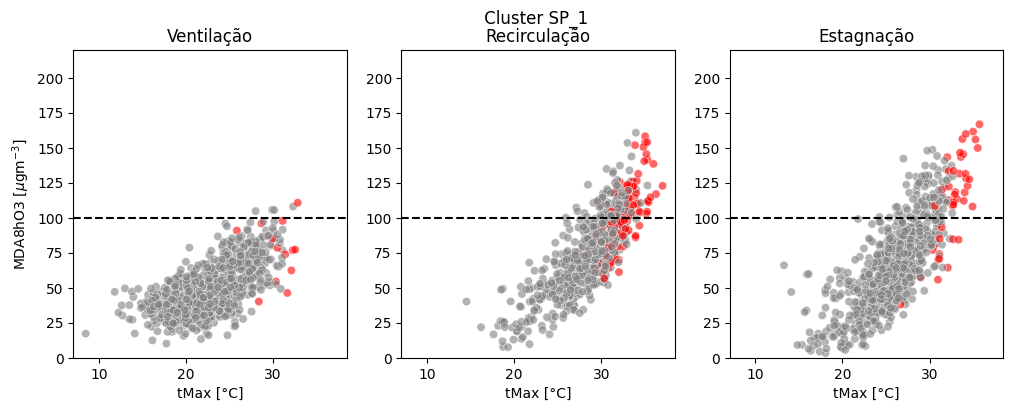

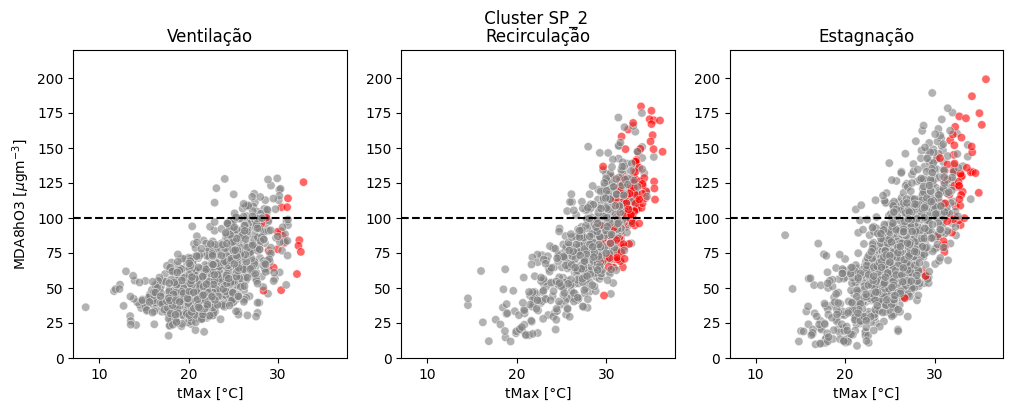

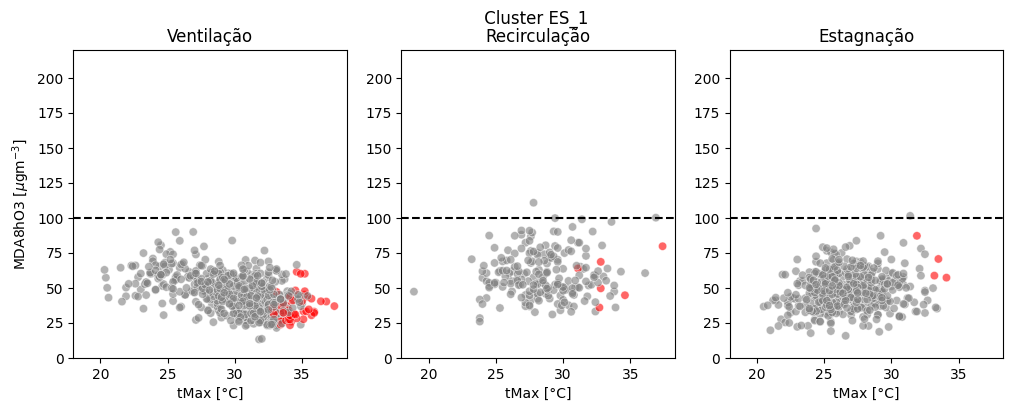

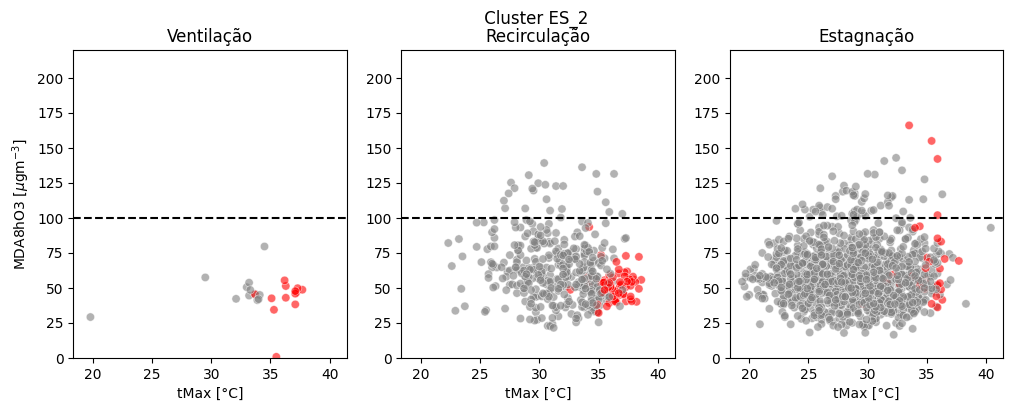

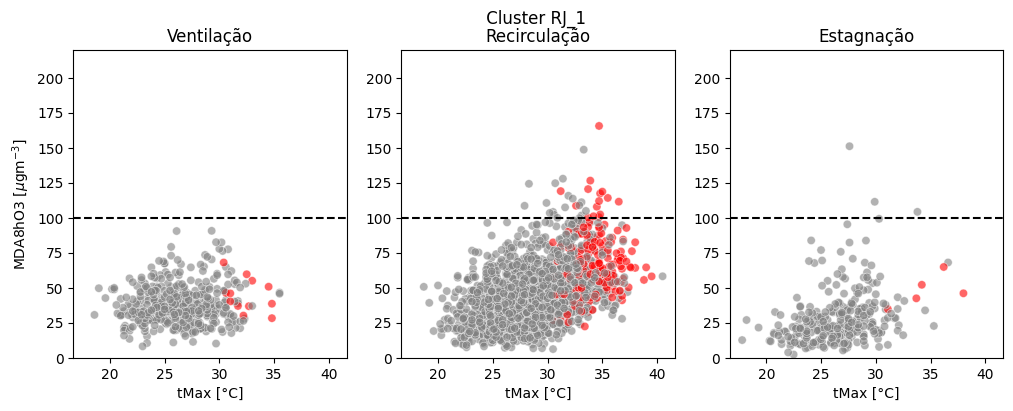

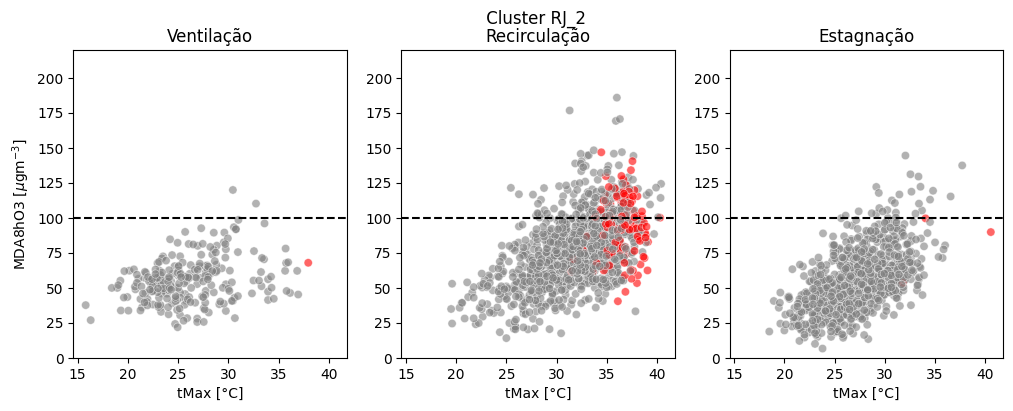

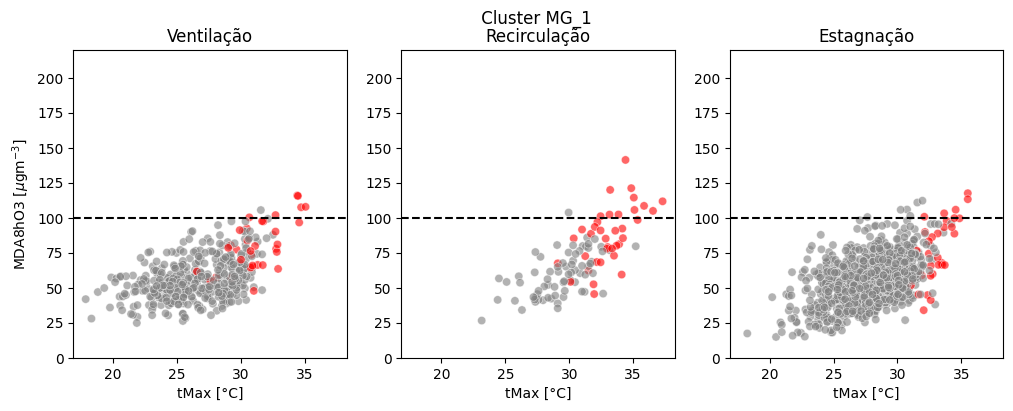

<ipython-input-3-af09ae1d3c00>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data = df_label[df_label.classificacao == 'Ventilação'], x = 'tMax_med', y = 'MDA8hO3', ax = axis[0], hue = hue_var, legend = False, hue_order = [False, True], palette = ['gray', 'r'], alpha = 0.6)


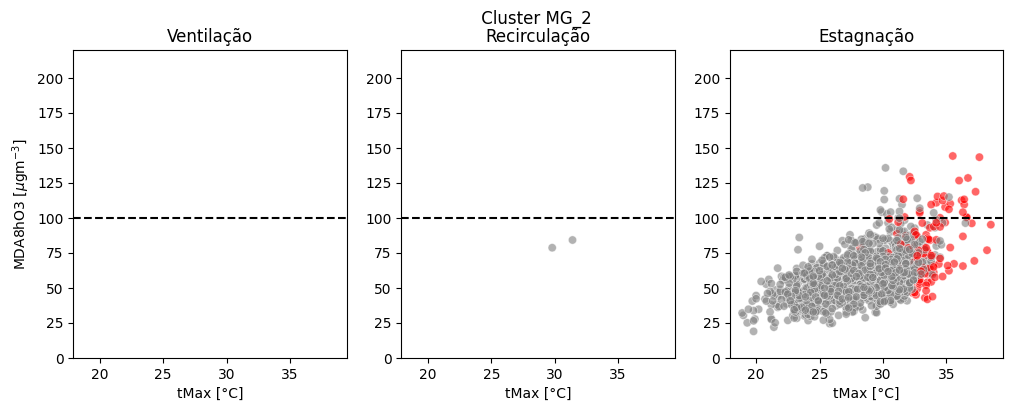

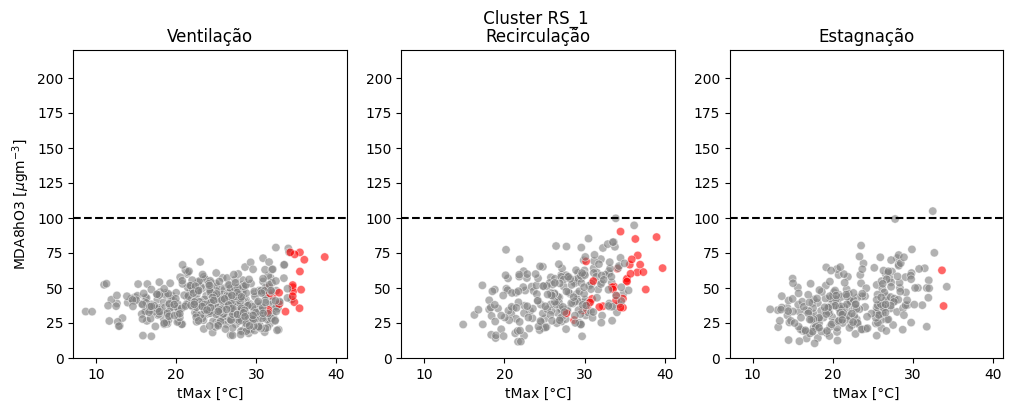

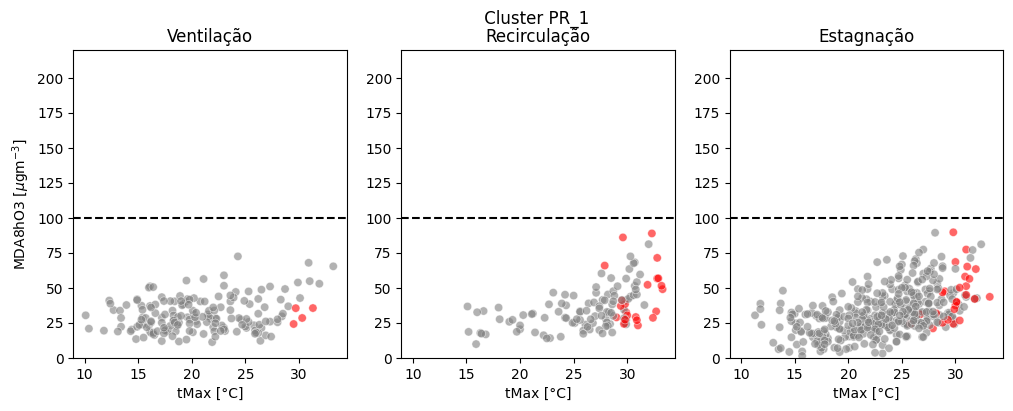

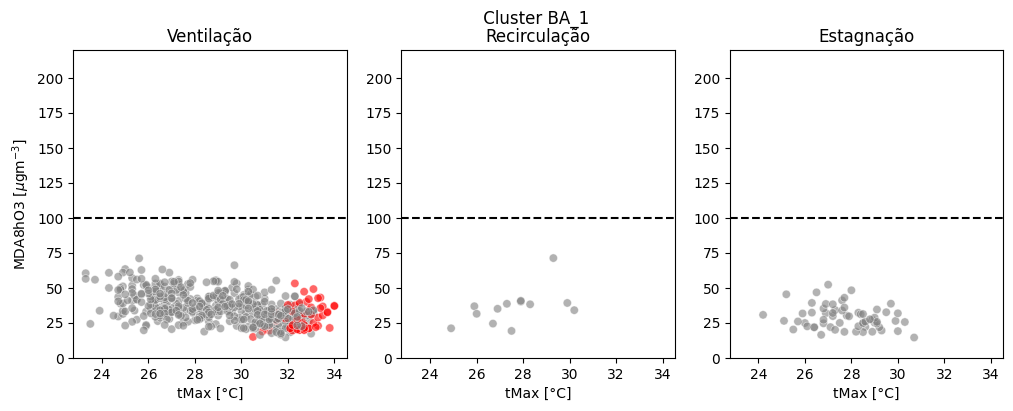

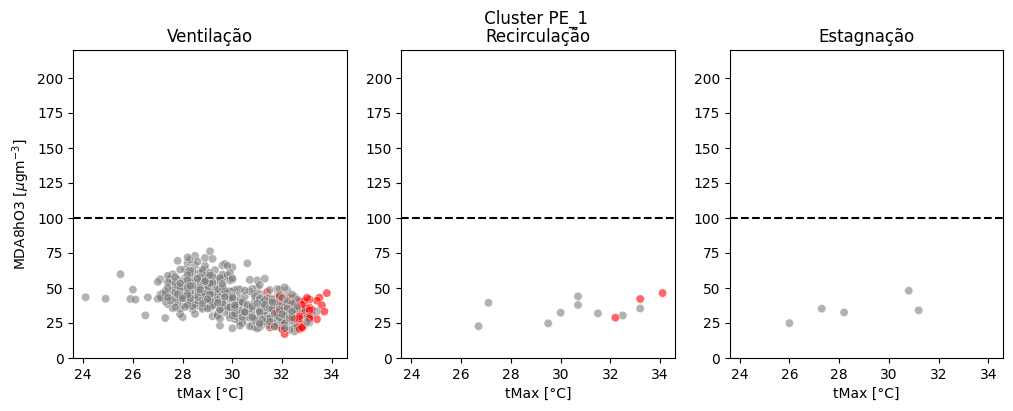

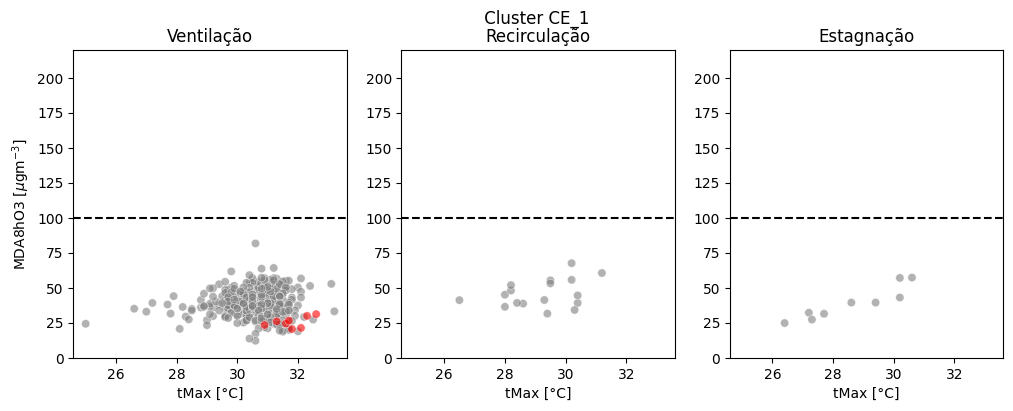

In [3]:
lista_labels = df_0.label.unique()
lista_labels = lista_labels[lista_labels != 'PR_2']

for label in lista_labels:
  df_label = df_0[df_0['label'] == label]
  df_label = df_label[df_label.classificacao!= 'Não classificado']
  fig, axis = plt.subplots(ncols = 3, figsize = (12,4), sharex=True)

  hue_var = 'heat_wave'

  sns.scatterplot(data = df_label[df_label.classificacao == 'Ventilação'], x = 'tMax_med', y = 'MDA8hO3', ax = axis[0], hue = hue_var, legend = False, hue_order = [False, True], palette = ['gray', 'r'], alpha = 0.6)
  axis[0].set_title('Ventilação')
  axis[0].set_xlabel('tMax [°C]')
  axis[0].set_ylabel('MDA8hO3 [${\mu}$gm$^{-3}$]')
  axis[0].axhline(y=100, linestyle = '--', color = 'k')
  axis[0].set_ylim(0, 220)

  sns.scatterplot(data = df_label[df_label.classificacao == 'Recirculação'], x = 'tMax_med', y = 'MDA8hO3', ax = axis[1], hue = hue_var, legend = False, hue_order = [False, True], palette = ['gray', 'r'], alpha = 0.6)
  axis[1].set_title('Recirculação')
  axis[1].set_xlabel('tMax [°C]')
  axis[1].set_ylabel('')
  axis[1].axhline(y=100, linestyle = '--', color = 'k')
  axis[1].set_ylim(0, 220)

  sns.scatterplot(data = df_label[df_label.classificacao == 'Estagnação'], x = 'tMax_med', y = 'MDA8hO3', ax = axis[2], hue = hue_var, legend = False, hue_order = [False, True], palette = ['gray', 'r'], alpha = 0.6)
  axis[2].set_title('Estagnação')
  axis[2].set_xlabel('tMax [°C]')
  axis[2].set_ylabel('')
  axis[2].axhline(y=100, linestyle = '--', color = 'k')
  axis[2].set_ylim(0, 220)

  plt.suptitle('     Cluster ' + label + '\n\n\n')
  plt.show()
  #